#### mga desisyong puno

In [25]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import make_classification

df = pd.read_csv("utrechthousinglarge.csv")
df.head()

X, y = make_classification(n_samples=1000, n_features=10, n_informative=6, n_redundant=0, 
                           n_clusters_per_class=1, n_classes=3, flip_y=0.01, class_sep=2, random_state=42)

df = pd.DataFrame(X, columns=["A", "B", "C", "D", "E", "F", "G", "H", "I", "J"])

df["Y"] = y

print(df)

            A         B         C         D         E         F         G  \
0   -0.926163 -1.209435 -2.328412 -3.897789 -0.432660 -2.376873 -2.148125   
1    1.597397  0.644690 -4.111567  2.996768 -0.404795 -0.190018  1.056251   
2    0.719169  1.819772 -1.957056  3.632469  1.056725  1.916848 -1.237002   
3   -0.052755  0.653479 -0.626968 -2.825443 -1.768057 -0.948911 -3.225756   
4    0.759787 -0.839528 -0.478438  2.618456  1.519952 -2.133519  0.898543   
..        ...       ...       ...       ...       ...       ...       ...   
995  1.304835  0.135176 -1.586724 -1.241206  0.606943 -1.236949  0.837428   
996  0.386586  1.359298  0.874165  6.012691  1.983634 -0.216139  0.104407   
997  1.299150  0.667548 -1.921731  1.430483 -0.247336 -1.317058  3.580233   
998 -1.619173  0.629740 -2.028462  1.192473  0.173947 -2.548595  2.653766   
999  0.571224  1.390644 -1.657982 -3.188163 -0.317103 -1.979923 -4.259614   

            H         I         J  Y  
0    0.392456 -3.070781 -1.272609  2

In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 11 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   A       1000 non-null   float64
 1   B       1000 non-null   float64
 2   C       1000 non-null   float64
 3   D       1000 non-null   float64
 4   E       1000 non-null   float64
 5   F       1000 non-null   float64
 6   G       1000 non-null   float64
 7   H       1000 non-null   float64
 8   I       1000 non-null   float64
 9   J       1000 non-null   float64
 10  Y       1000 non-null   int32  
dtypes: float64(10), int32(1)
memory usage: 82.2 KB


In [27]:
df.isna().sum()

A    0
B    0
C    0
D    0
E    0
F    0
G    0
H    0
I    0
J    0
Y    0
dtype: int64

<Axes: xlabel='A', ylabel='B'>

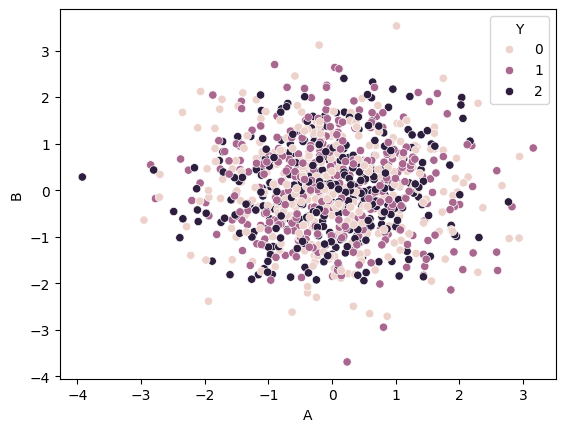

In [28]:
df = df.dropna()
sns.scatterplot(x='A',y='B',data=df,hue='Y')

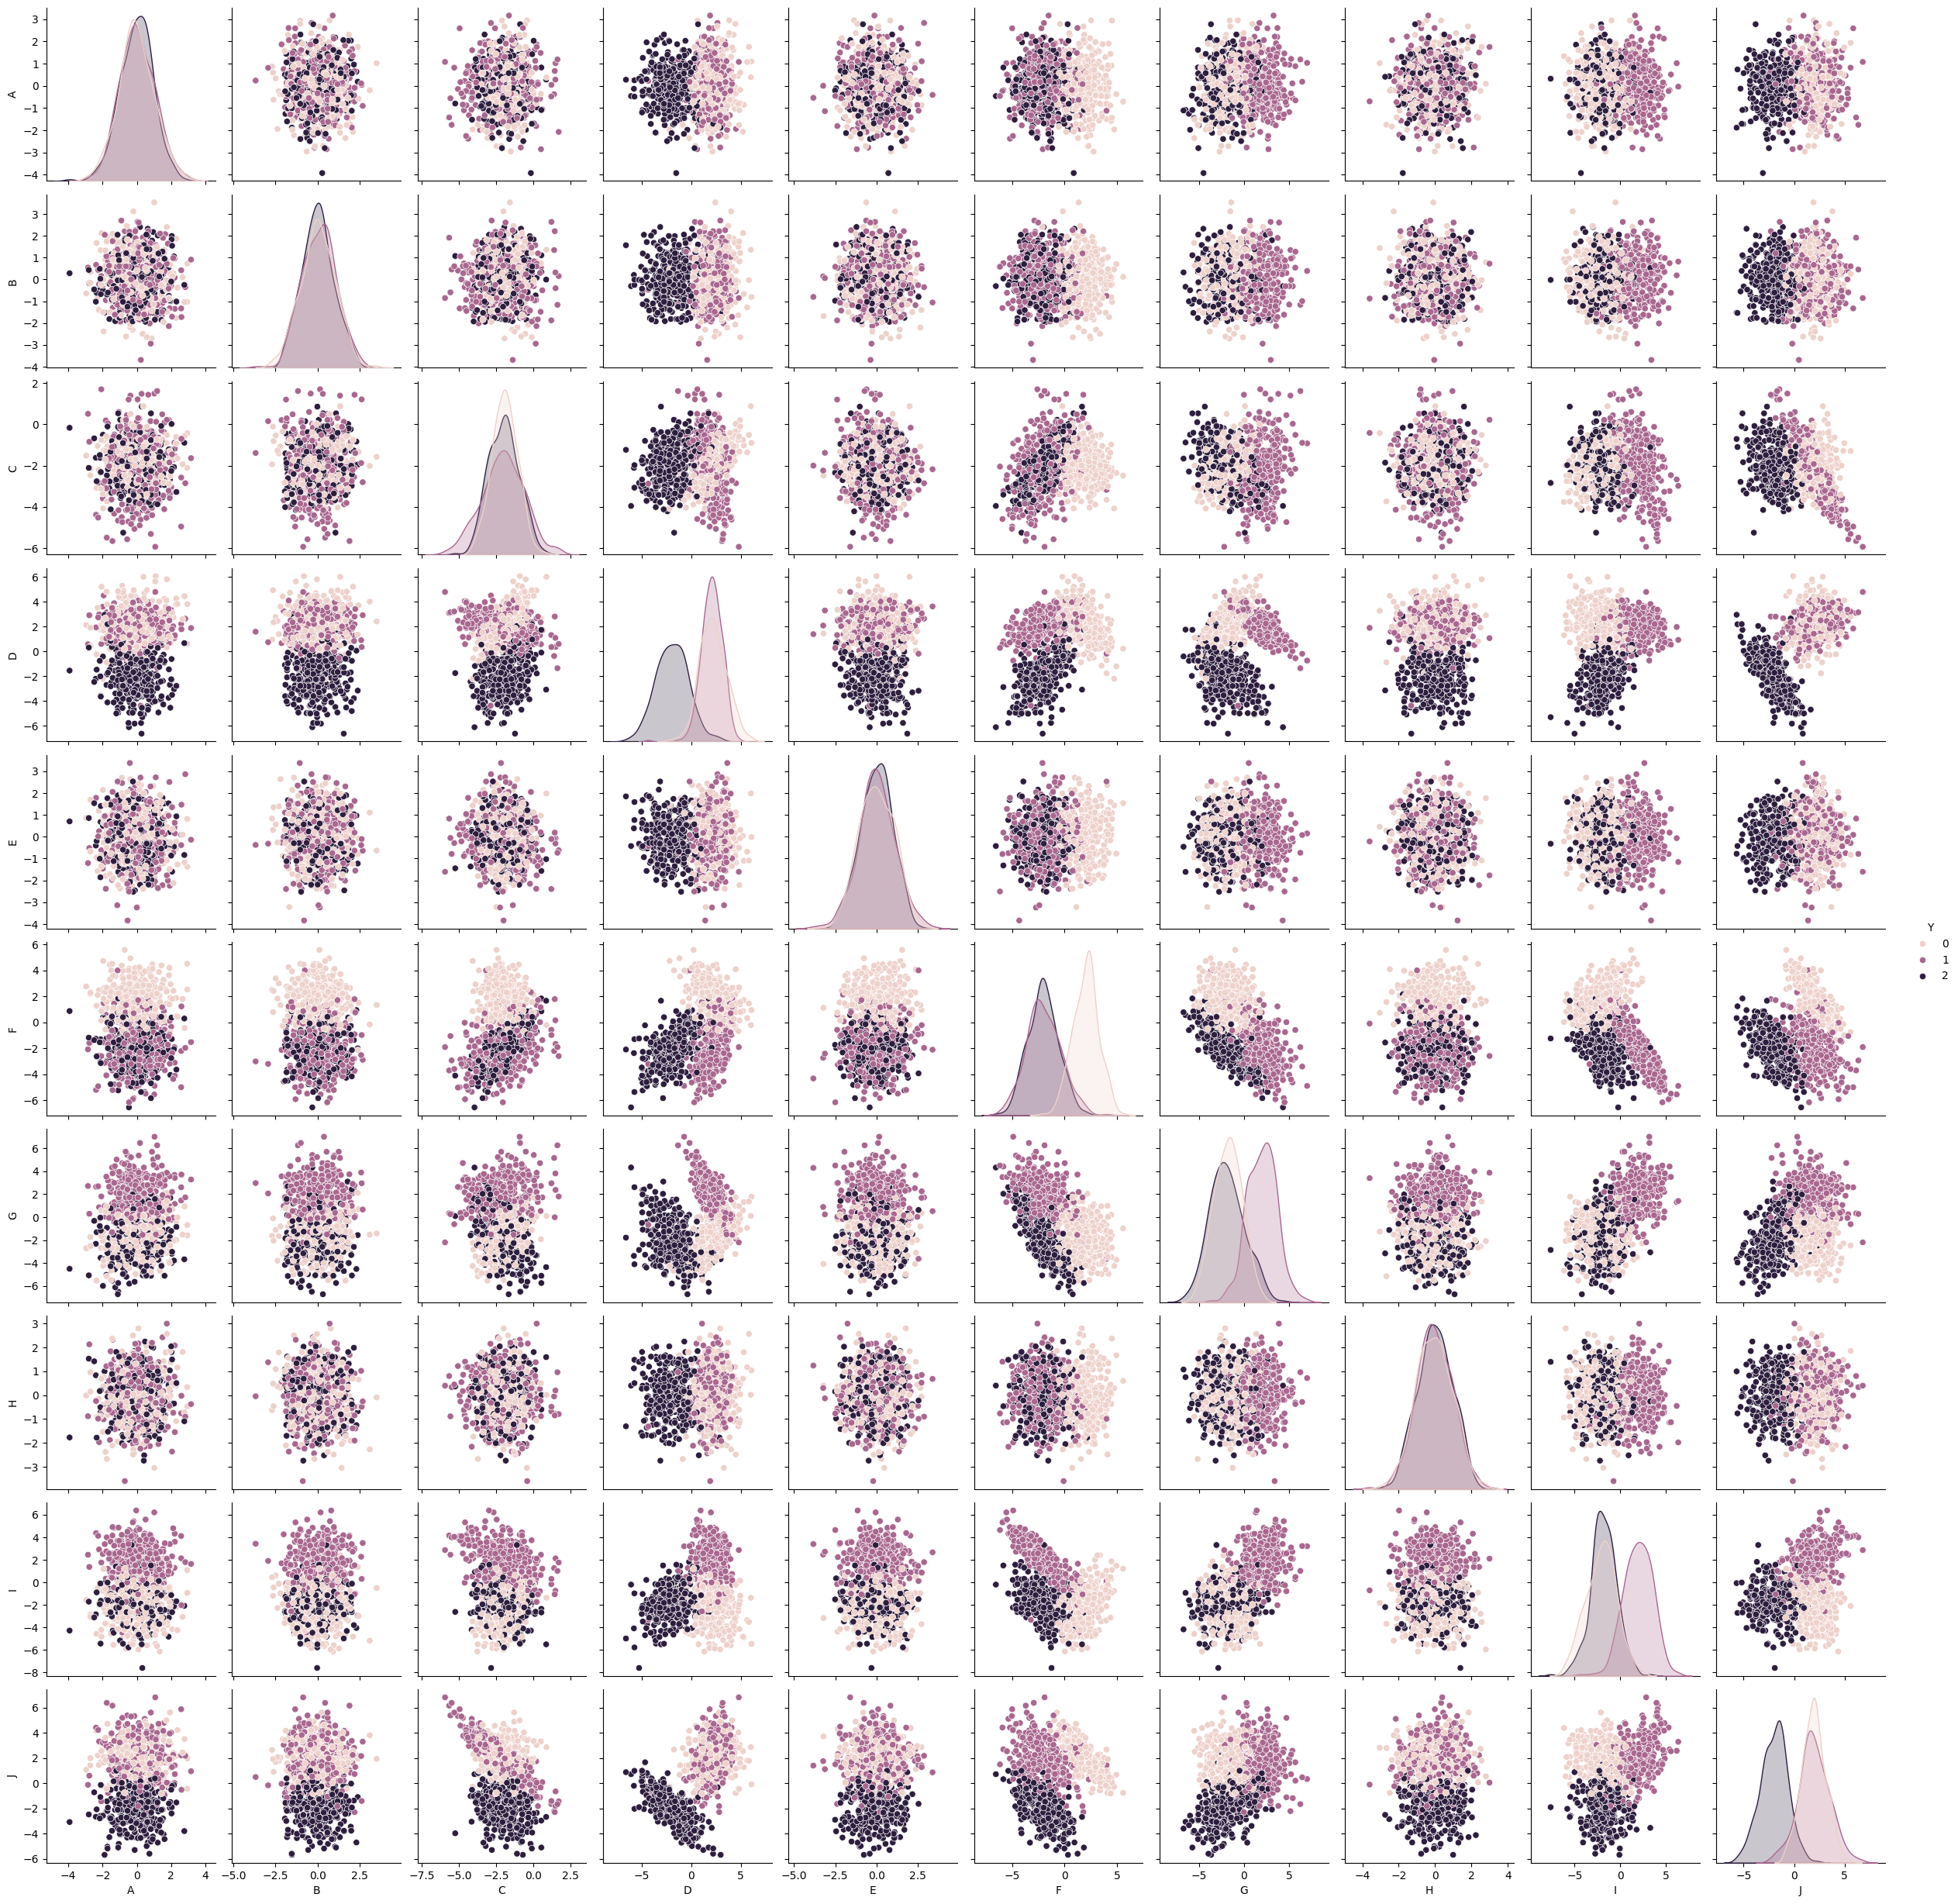

In [29]:
sns.pairplot(df,hue='Y')

In [30]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)
model = DecisionTreeClassifier()
model.fit(X_train,y_train)
base_pred = model.predict(X_test)

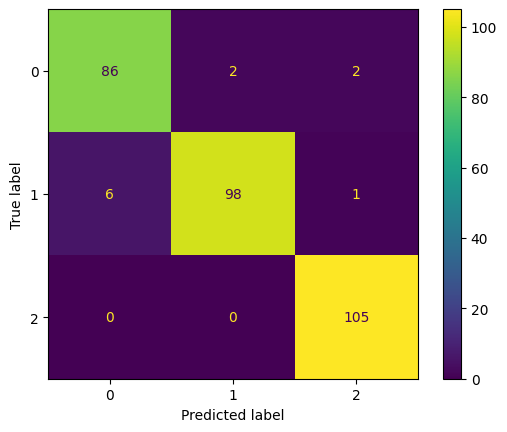

In [31]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay,classification_report
import matplotlib.pyplot as plt

y_pred = model.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
cmd = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_)
cmd.plot()
plt.show()  # This line is to make sure the plot is displayed in some environments.

In [32]:
print(classification_report(y_test,base_pred))

              precision    recall  f1-score   support

           0       0.93      0.96      0.95        90
           1       0.98      0.93      0.96       105
           2       0.97      1.00      0.99       105

    accuracy                           0.96       300
   macro avg       0.96      0.96      0.96       300
weighted avg       0.96      0.96      0.96       300



In [33]:
model.feature_importances_

array([0.        , 0.00407065, 0.04429677, 0.04260866, 0.        ,
       0.40777047, 0.01533108, 0.00728501, 0.10290352, 0.37573385])

   Feature Importance
A            0.000755
B            0.002986
C            0.007663
D            0.197656
E            0.002504
F            0.292694
G            0.019016
H            0.002746
I            0.042540
J            0.431440


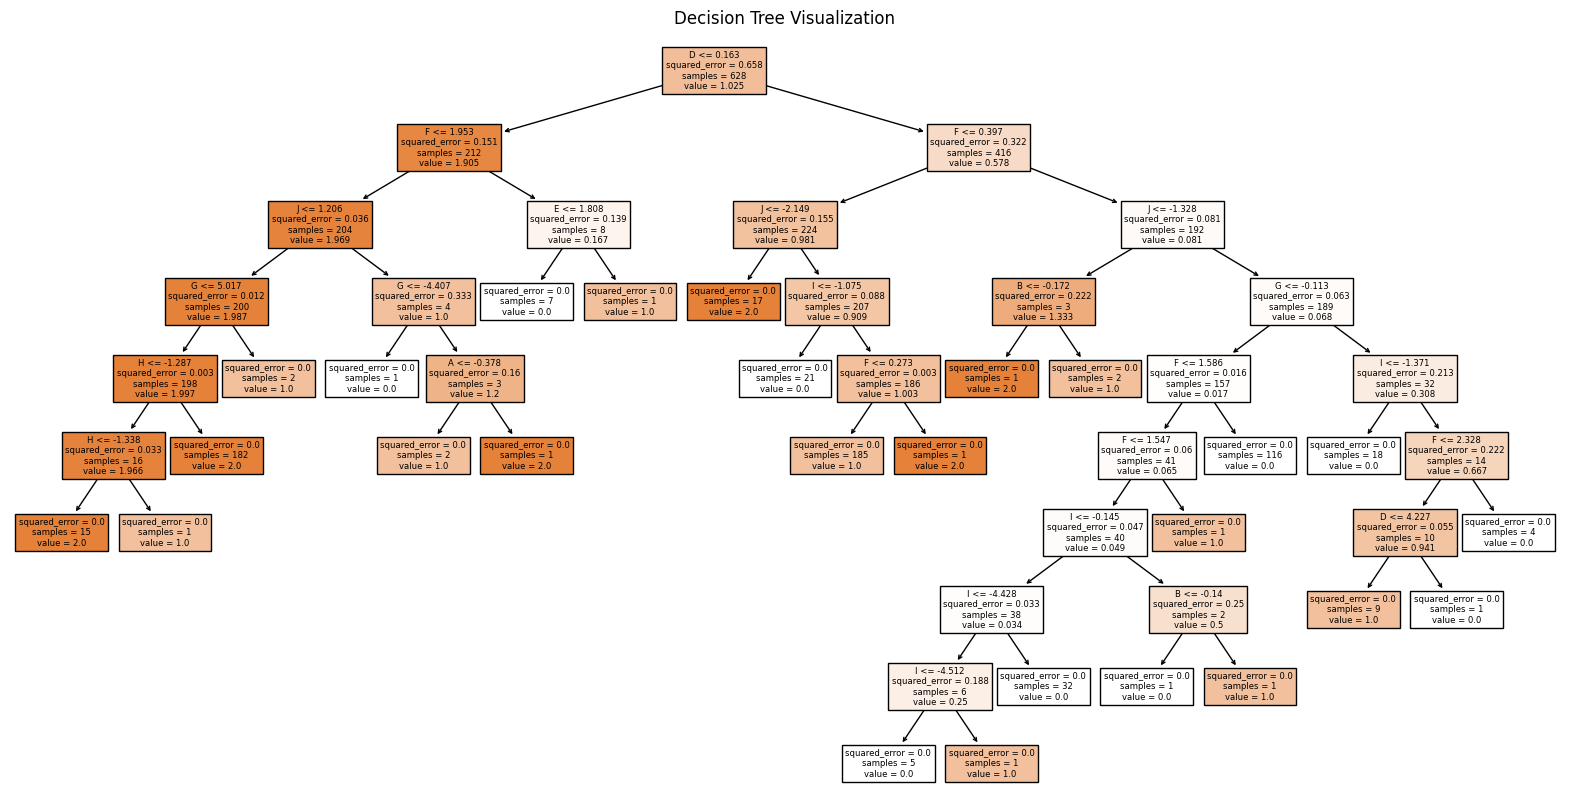

In [39]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor, plot_tree
features = ["A", "B", "C", "D", "E", "F", "G", "H", "I", "J"]
target = 'Y'

X = df[features]
y = df[target]

model = RandomForestRegressor(random_state=42)
model.fit(X, y)

feature_importances = pd.DataFrame(index=X.columns, data=model.feature_importances_, columns=['Feature Importance'])
print(feature_importances)

model = RandomForestRegressor(random_state=42)
model.fit(X, y)

single_tree = model.estimators_[0]

plt.figure(figsize=(20, 10))
plot_tree(single_tree, filled=True, feature_names=features)
plt.title("Decision Tree Visualization")
plt.show()

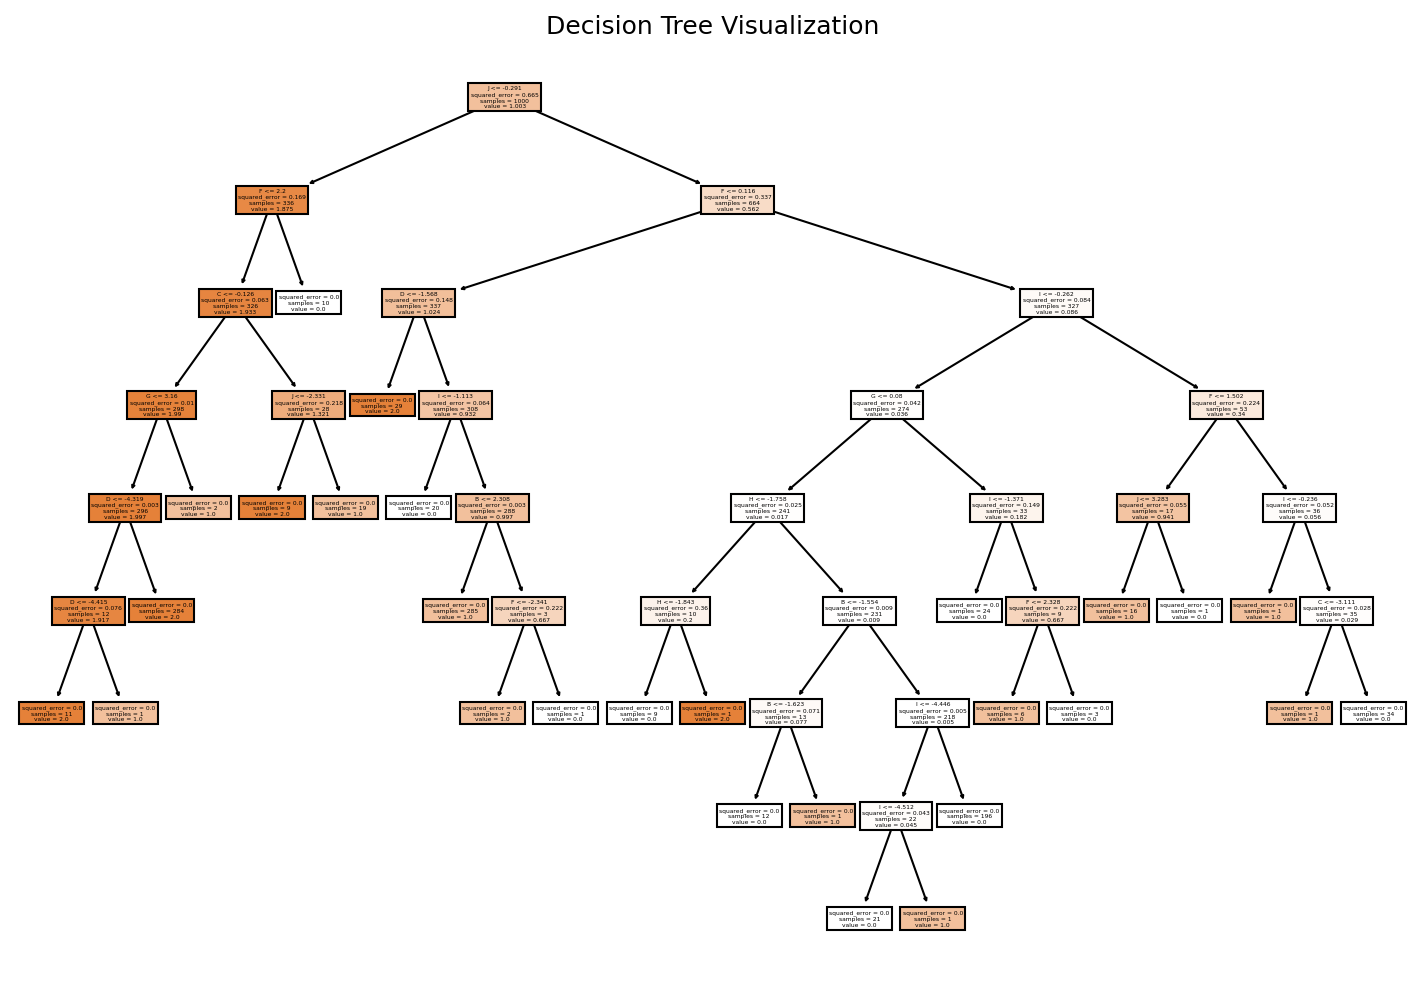

In [41]:
X = df[features]
y = df[target]

model = DecisionTreeRegressor(random_state=42)
model.fit(X, y)

plt.figure(figsize=(12, 8), dpi=150)
plot_tree(model, filled=True, feature_names=features)
plt.title("Decision Tree Visualization")
plt.show()

In [46]:
def report_model(model, X_test, y_test, feature_names):
    model_preds = model.predict(X_test)
    print(classification_report(y_test, model_preds))
    print('\n')